In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [5]:
df.shape

(14999, 10)

In [6]:
df.turnover.unique()

array([1, 0], dtype=int64)

In [7]:
df.turnover.value_counts() / df.shape[0]

turnover
0    0.761917
1    0.238083
Name: count, dtype: float64

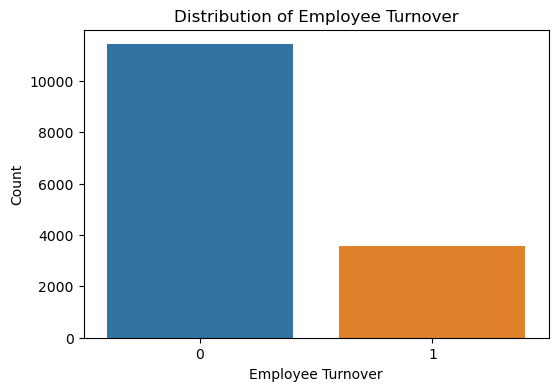

In [8]:
plt.figure(figsize = (6,4))
turnover = df.turnover.value_counts()
sns.barplot(x = turnover.index, y = turnover.values)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover') 
plt.ylabel('Count')
plt.show()

#### 1. Perform data quality check by checking for missing values if any.

In [9]:
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
department             False
salary                 False
dtype: bool

In [10]:
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

#### 2. Understand what factors contributed most to employee turnover by EDA

In [11]:
round(df.describe(),2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [12]:
turnover_summary = df.groupby('turnover')
turnover_summary.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [13]:
round(turnover_summary.mean(numeric_only=True),2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [14]:
round(turnover_summary.std(numeric_only=True),2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


In [15]:
corr = df.corr(numeric_only = True)
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


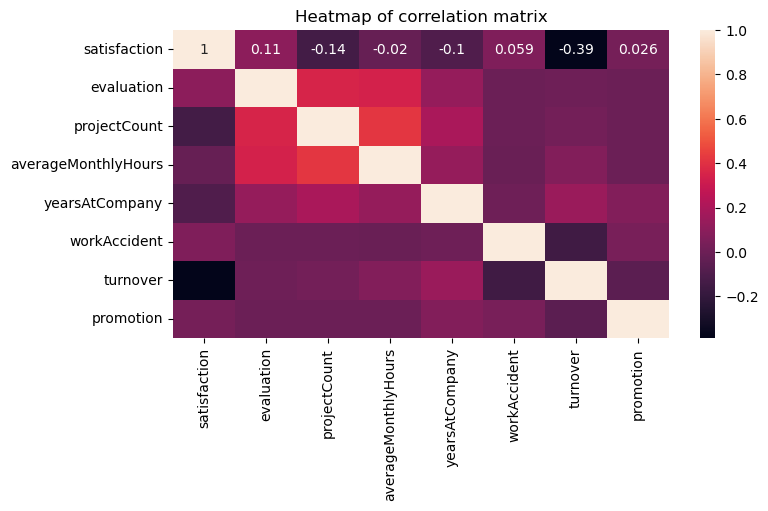

In [16]:
plt.figure(figsize = (8,4))
sns.heatmap(corr, annot = True)
plt.title('Heatmap of correlation matrix')
plt.show()

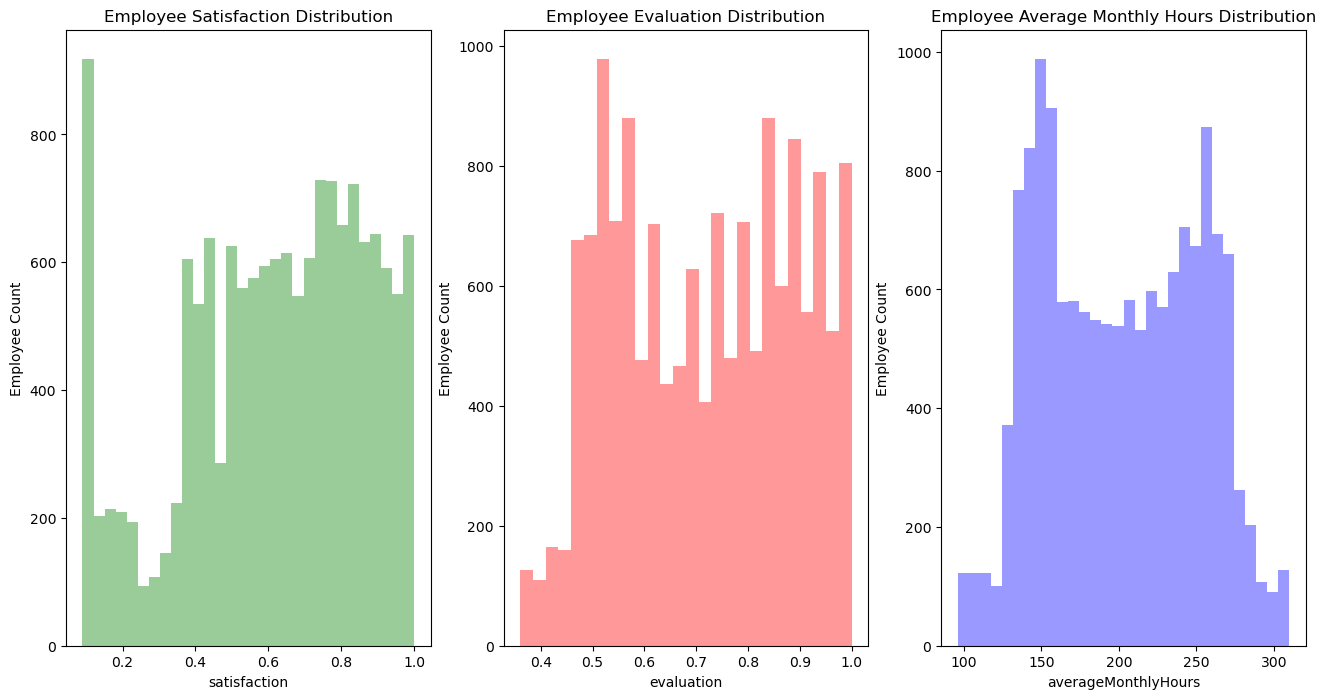

In [17]:
f, axes = plt.subplots(ncols = 3, figsize=(16,8))

sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count');

sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count');

sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count');

AttributeError: 'numpy.int64' object has no attribute 'startswith'

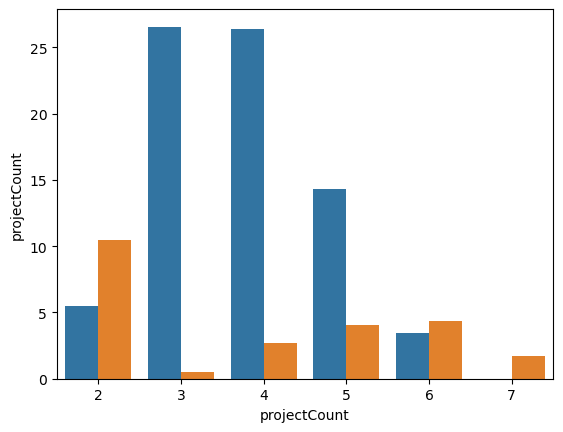

In [18]:
sns.barplot(x = 'projectCount', y = 'projectCount', hue = 'turnover', data = df, estimator = lambda x: len(x) / len(df) * 100)

* If the project count is less than 2, then most of the employees are leaving the company.
* If the project count is between 3-5, then many employees are staying and very few are leaving the company.
* If the project count is 6 or 7, then almost all of the empoyees are leaving.
* There is an increase in employee turnover when the number of projects is either very low (2) or very high (7).

#### 3. Perform clustering of Employees who left based on their satisfaction and evaluation.

In [19]:
df_numeric = df.select_dtypes('number')
df_numeric

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df_numeric[df_numeric.turnover==1][['satisfaction', 'evaluation']])

KMeans(n_clusters=3, random_state=2)

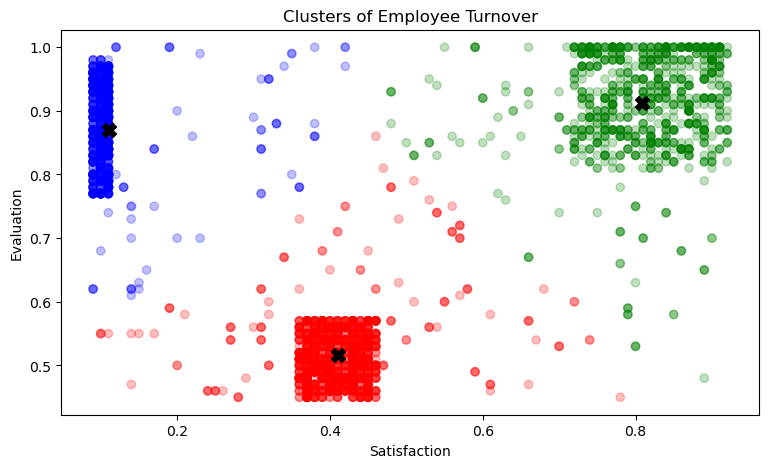

In [21]:
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(9,5))
plt.scatter(x='satisfaction', y='evaluation', data=df_numeric[df.turnover==1], alpha=0.25, color=kmeans_colors)
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='black', marker='X', s=100)
plt.title('Clusters of Employee Turnover')
plt.show()

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

#### 4. Handle the left Class Imbalance using SMOTE technique.

##### 4a. Preprocessing data by converting categorical columns to numerical value

In [22]:
cat_column = ['department', 'salary']
num_column = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'turnover']

In [23]:
categorical_df = pd.get_dummies(df[cat_column], drop_first = True, dummy_na = True)

In [24]:
categorical_df

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,department_nan,salary_low,salary_medium,salary_nan
0,False,False,False,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False,False,True,False,False
14995,False,False,False,False,False,False,False,True,False,False,True,False,False
14996,False,False,False,False,False,False,False,True,False,False,True,False,False
14997,False,False,False,False,False,False,False,True,False,False,True,False,False


In [25]:
numerical_df = df[num_column]
new_df = pd.concat([categorical_df, numerical_df], axis = 1)
new_df.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,department_nan,salary_low,salary_medium,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover
0,False,False,False,False,False,False,True,False,False,False,True,False,False,0.38,0.53,2,157,3,0,1
1,False,False,False,False,False,False,True,False,False,False,False,True,False,0.80,0.86,5,262,6,0,1
2,False,False,False,False,False,False,True,False,False,False,False,True,False,0.11,0.88,7,272,4,0,1
3,False,False,False,False,False,False,True,False,False,False,True,False,False,0.72,0.87,5,223,5,0,1
4,False,False,False,False,False,False,True,False,False,False,True,False,False,0.37,0.52,2,159,3,0,1


##### 4b. Split the data into train and test

In [26]:
from sklearn.model_selection import train_test_split
X = new_df.drop('turnover', axis = 1)
Y = new_df['turnover']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

##### 4c. Class imbalance

In [28]:
round(df.turnover.value_counts(1), 2)

turnover
0    0.76
1    0.24
Name: proportion, dtype: float64

In [29]:
from imblearn.over_sampling import SMOTE

#Upsample using SMOTE
sm = SMOTE(random_state=123, sampling_strategy=1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [30]:
print('Original Shape: ', X_train.shape, Y_train.shape)
print('SMOTE Sample shape: ', x_train_sm.shape, y_train_sm.shape)

Original Shape:  (11999, 19) (11999,)
SMOTE Sample shape:  (18274, 19) (18274,)


#### 5. Perform k-fold cross-validation model training and evaluate performance.

In [31]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr', solver='liblinear') #ovr: one vs rest
from sklearn import model_selection

In [32]:
# Set up KFold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)

In [33]:
logit_model.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [34]:
logit_model.score(X_test, Y_test)  #Accuracy

0.7893333333333333

#### Model Evaluation Classification Metrics
    * Accuracy, Confusion Matrix, Classification Report - Precision, Recall, Sensitivity

In [35]:
y_pred = logit_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, y_pred)

array([[2136,  155],
       [ 477,  232]], dtype=int64)

<Axes: >

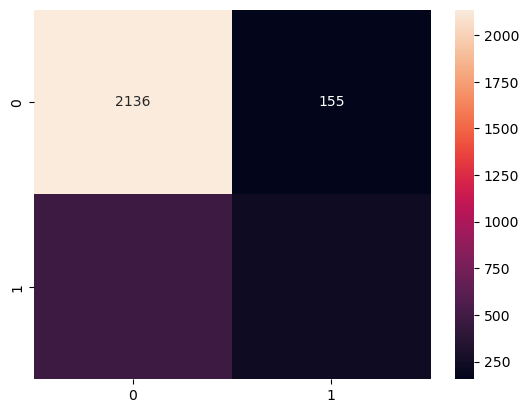

In [37]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='0.0f')

In [38]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2291
           1       0.60      0.33      0.42       709

    accuracy                           0.79      3000
   macro avg       0.71      0.63      0.65      3000
weighted avg       0.77      0.79      0.77      3000



In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced")
from sklearn import model_selection
# Set up KFold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)

In [40]:
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced')

In [41]:
rf.score(X_train, Y_train)    #Accuracy

1.0

In [42]:
y1_pred = rf.predict(X_test)
y1_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, y1_pred)

array([[2283,    8],
       [  16,  693]], dtype=int64)

<Axes: >

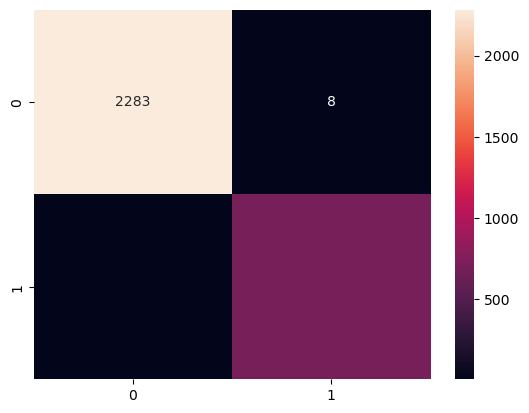

In [44]:
sns.heatmap(confusion_matrix(Y_test, y1_pred), annot=True, fmt='0.0f')

In [45]:
print(classification_report(Y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
from sklearn import model_selection
# Set up KFold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)

In [47]:
clf_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [48]:
clf_model.score(X_train, Y_train)  #Accuracy

0.9528294024502042

In [49]:
y2_pred = clf_model.predict(X_test)
y2_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, y2_pred)

array([[2207,   84],
       [  56,  653]], dtype=int64)

<Axes: >

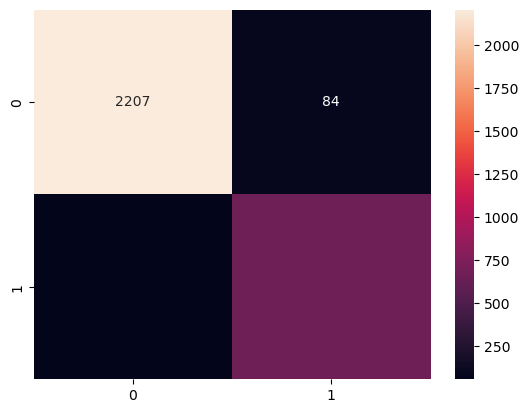

In [51]:
sns.heatmap(confusion_matrix(Y_test, y2_pred), annot=True, fmt='0.0f')

In [52]:
print(classification_report(Y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2291
           1       0.89      0.92      0.90       709

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



#### 6. Identify the best model and justify the evaluation metrics used.

* Considering the accuracy, precision, recall and f1-score, Decision Tree Classifier produced best results (0.95)
* Accuracy of Random Forest Classifier jumped to 100% (overfitting)
* The model of logistic regression performed poorly with an accuracy of (0.79) and low precision, recall and f1-score.
* The HR department can use Decision Tree ML model as it has turned out to be the best performing (neither overfitted nor underfitted).

#### 7. Suggest various retention strategies for targeted employees.

In [54]:
from sklearn import tree

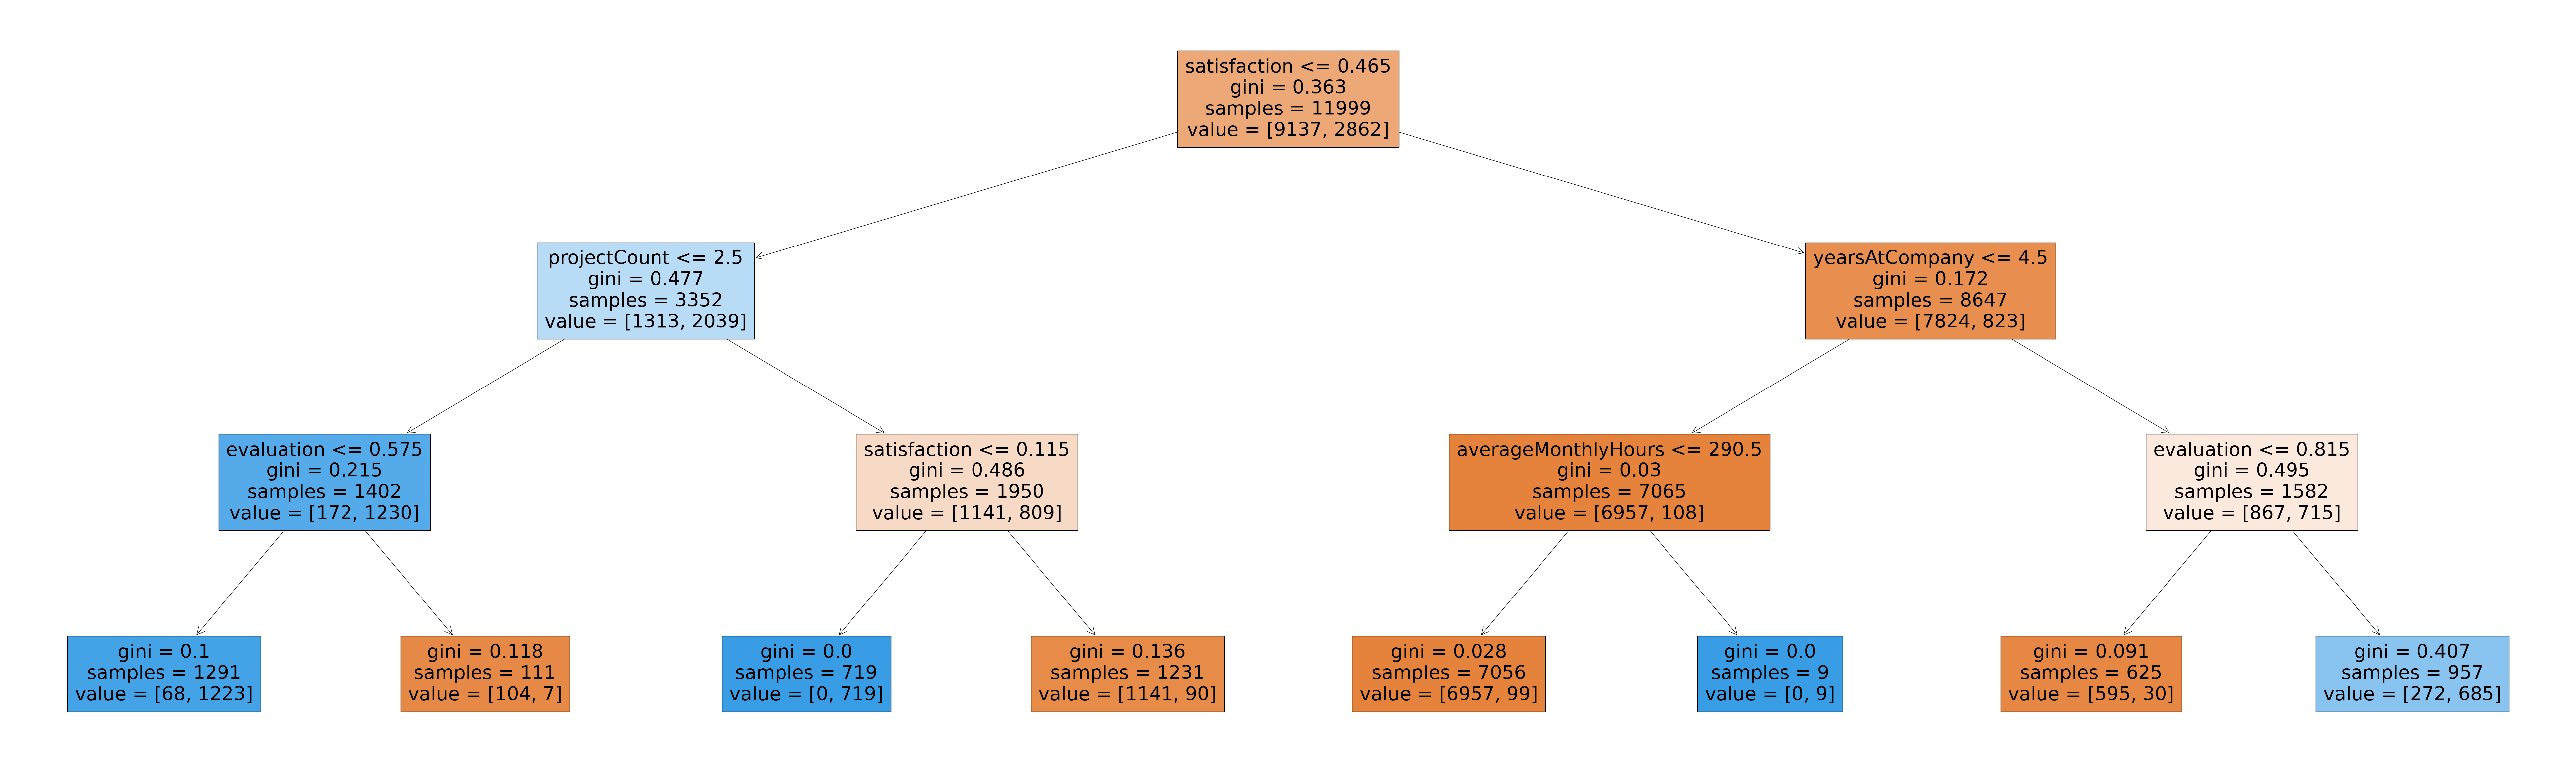

In [58]:
fig = plt.figure(figsize = (100,30))
_ = tree.plot_tree(clf_model, filled = True, feature_names = X.columns)

* Cluster 1 (Blue): Employees within this are high performers but are at a greater  risk of turnover. Immediate actions should be taken either in terms of reducing their workload or compensating them adequately to improve their work satisfaction score. 
* Cluster 2 (Red): Employees within this are low performing and at a higher risk of leaving the company. Their performance should be monitored regularly. An improvements must be compensated with good projects and better pay.
* Cluster 3 (Green): Employees within this zone are considered safe.